# Analiza podatkov

V tej datoteki je analiza podatkov zbranih v csv datotekah v mapi 'zajem-podatkov/obdelani-podatki'. Odgovarjala bom na vprašanja zastavljena v datoteki README.md.

Importajmo željene knjižice in preberimo datoteko izloščene_informacje.csv ter izpišimo tabelo.

In [31]:
import pandas as pd
import matplotlib

In [33]:
avti = pd.read_csv('../zajem-podatkov/obdelani-podatki/izluščene_informacije.csv')

In [34]:
avti

,znamka,model,generacija,verzija,prvo leto proizvodnje,gorivo,poravnava motorja,prostornina motorja,moč motorja,prisilno polnenje motorja,pospesevanje,max hitrost,navor,emisije,poraba
0,Polestar,1,NaN,T8R,2020.0,hybrid_petrol,NaN,1969.0,609.0,NaN,4.2,250.0,1000.0,15.0,1.3
1,Rover,100,NaN,1.1 ate97,1995.0,Petrol,NaN,1120.0,60.0,NaN,14.8,155.0,90.0,NaN,6.2
2,Rover,100,NaN,1.1,1990.0,Petrol,NaN,1120.0,60.0,NaN,14.8,155.0,90.0,NaN,5.9
3,Rover,100,NaN,1.4 GTi 16v MPI,1991.0,Petrol,NaN,1396.0,103.0,NaN,9.5,190.0,127.0,NaN,6.9
4,Rover,100,NaN,1.4 GTi 16v,1990.0,Petrol,NaN,1396.0,90.0,NaN,9.8,183.0,120.0,NaN,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16026,Citroen,ZX,NaN,1.9 Kat,1991.0,Petrol,NaN,1905.0,122.0,NaN,10.2,201.0,150.0,NaN,8.6
16027,Citroen,ZX,NaN,1.9 TD D8A,1993.0,Diesel,NaN,1905.0,91.0,NaN,12.0,185.0,196.0,NaN,5.9
16028,Citroen,ZX,NaN,1.9 TD DHY,1993.0,Diesel,NaN,1905.0,90.0,NaN,12.2,183.0,196.0,NaN,6.1
16029,Citroen,ZX,NaN,16v,1996.0,Petrol,NaN,1998.0,167.0,NaN,8.5,219.0,193.0,NaN,8.6


## 1. Katera vrsta goriva je najpogosteje uporabljena?

Poglejmo najprej katere vrste goriva so sploh zastopane in preštejmo število pojavitev.

In [35]:
avti.gorivo.unique()

array(['hybrid_petrol', 'Petrol', 'Diesel', 'Electric', 'hybrid_diesel',
       'petrol_cng', 'petrol_lpg', nan, 'petrol_ethanol', 'lpg_cng'],
      dtype=object)

In [36]:
vrednosti = avti.gorivo.value_counts()
okvir_1 = {'Število avtmobilov' : vrednosti}
tabela_goriva = pd.DataFrame(okvir_1)
tabela_goriva

,Število avtmobilov
Petrol,9503
Diesel,5865
hybrid_petrol,284
Electric,198
petrol_ethanol,63
petrol_lpg,59
petrol_cng,27
hybrid_diesel,22
lpg_cng,2


Priredimo velikost in rob grafov, ter narišimo graf števila avtomobilov.

<AxesSubplot:ylabel='Število avtmobilov'>

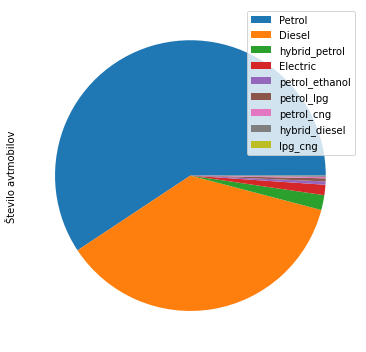

In [68]:
matplotlib.rcParams["figure.figsize"] = [9, 5]
matplotlib.rcParams["figure.autolayout"] = True
tabela_goriva.plot.pie(y='Število avtmobilov', labels = None)

Opazimo, da je bencin najbolj uporabljen.

## 2. Je poravnava motorja odvisna od velikosti vozila?

Združimo glavni csv s csv-jem dimenzij.

In [38]:
dimenzije = pd.read_csv('../zajem-podatkov/obdelani-podatki/dimenzije.csv')
dimenzije

,znamka,model,generacija,verzija,višina,širina,dolžina,teža
0,Polestar,1,NaN,T8R,135.2,195.8,458.6,2250.0
1,Rover,100,NaN,1.1 ate97,138.0,156.0,356.0,806.0
2,Rover,100,NaN,1.1,138.0,156.0,352.0,806.0
3,Rover,100,NaN,1.4 GTi 16v MPI,138.0,156.0,352.0,865.0
4,Rover,100,NaN,1.4 GTi 16v,138.0,156.0,352.0,859.0
...,...,...,...,...,...,...,...,...
16026,Citroen,ZX,NaN,1.9 Kat,139.0,171.0,408.0,1050.0
16027,Citroen,ZX,NaN,1.9 TD D8A,140.0,170.0,407.0,1085.0
16028,Citroen,ZX,NaN,1.9 TD DHY,140.0,170.0,407.0,1109.0
16029,Citroen,ZX,NaN,16v,138.0,172.0,408.0,1149.0


In [77]:
avti_in_dimenzije = pd.merge(avti, dimenzije, on='verzija')
avti_in_dimenzije[['verzija', 'prostornina motorja', 'višina', 'širina', 'dolžina']]

,verzija,prostornina motorja,višina,širina,dolžina
0,T8R,1969.0,135.2,195.8,458.6
1,1.1 ate97,1120.0,138.0,156.0,356.0
2,1.1,1120.0,138.0,156.0,352.0
3,1.1,1120.0,138.0,156.0,356.0
4,1.1,1120.0,145.0,160.0,348.0
...,...,...,...,...,...
69352,Zen,NaN,156.2,173.0,408.4
69353,1.9 D (EGR),1905.0,140.0,170.0,407.0
69354,1.9 Kat,1905.0,139.0,171.0,408.0
69355,1.9 TD D8A,1905.0,140.0,170.0,407.0


Izračunajmo prostornino vozila v $m^2$. Podatek shranimo v nov stolpec 'prostornina', nato pa izpišimo tabelo vseh vrstic, ki nimajo nobene vrstiče od 'verzije', 'prostornine motorja' in 'prostornine' prazne.

In [78]:
def velikost(v, s, d): return v * s * d

vrednosti = velikost(avti_in_dimenzije.višina / 100, 
                     avti_in_dimenzije.širina / 100,
                     avti_in_dimenzije.dolžina / 100)

avti_in_dimenzije['prostornina'] = vrednosti
tabela_velikosti = avti_in_dimenzije[['verzija', 'prostornina motorja', 'prostornina']].dropna()
tabela_velikosti

,verzija,prostornina motorja,prostornina
0,T8R,1969.0,12.140133
1,1.1 ate97,1120.0,7.663968
2,1.1,1120.0,7.577856
3,1.1,1120.0,7.663968
4,1.1,1120.0,8.073600
...,...,...,...
69343,2.1 Turbo DS,2088.0,14.069772
69353,1.9 D (EGR),1905.0,9.686600
69354,1.9 Kat,1905.0,9.697752
69355,1.9 TD D8A,1905.0,9.686600


Grupirajmo tabelo po prostorninah motorjev in vsaki pripredimo povprečno velikost vozila.

In [79]:
tabela2 = tabela_velikosti.groupby('prostornina motorja').mean()[['prostornina']]
tabela2

,prostornina
prostornina motorja,
158.0,10.801189
196.0,11.150642
273.0,3.059000
354.0,9.383623
356.0,9.319242
...,...
8277.0,10.310590
8285.0,10.306723
8382.0,10.301888


Iz tabele ne razberem nobene povezave med prostornino motorja in velikostjo vozila. 

<AxesSubplot:xlabel='prostornina motorja', ylabel='prostornina'>

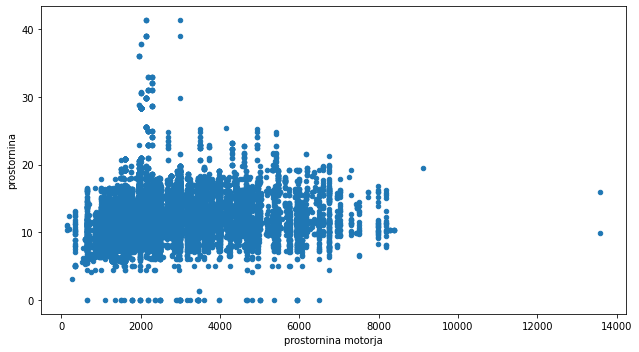

In [80]:
tabela_velikosti.plot.scatter(x = 'prostornina motorja', y = 'prostornina')

Še vedno ne vidim povezave.

## 3. Imajo superchargerji ali turbo motorji večjo moč?

Ta razdelek ne deluje, ker me je spletna stran blokirala na način, da ni pokazala celotnih html datotek. Vrednosti 'prisilno polnenje motorja' so zato ostale skrite.

Tvorimo tabelo, vseh avtov, ki imajo ali turbo motor ali supercharger.

In [43]:
a = avti[['znamka', 'prisilno polnenje motorja', 'moč motorja']]
polnjenje_in_moc = a[(a['prisilno polnenje motorja'] == 'Turbo') | 
                     (a['prisilno polnenje motorja'] == 'Supercharger')]
polnjenje_in_moc

,znamka,prisilno polnenje motorja,moč motorja


Nato grupirajmo najprej po moči motorja, nato pa po prisilnem polnenju motorja. Torej za vsako možno moč motorja ustvarimo dva razdelka - 'Turbo' in 'Supercharger' - ter preštejmo koliko avtov pripada kateri grupi.

In [44]:
serija_po_moci = polnjenje_in_moc.groupby(['moč motorja', 'prisilno polnenje motorja']).count()['znamka']
serija_po_moci

Series([], Name: znamka, dtype: int64)

Narišimo graf. Na x-osi naj bo moč motorja, na y-osi pa število avtomobilov. Za vsako moč motorja naredimo (največ) dva stolpca, enega za Turbo, drugega za Supercharger.

In [45]:
s = serija_po_moci.reset_index()
s.set_index('moč motorja', inplace=True)
s.groupby('prisilno polnenje motorja')['znamka'].plot.bar(legend=True, 
                                                          stacked=False,
                                                          width=5)

Series([], Name: znamka, dtype: float64)

## 4. Kako navor vpliva na pospeševanje do $100 \frac{km}{h}$?

Iz glavna tabele 'avti' nas zdaj zanimata vrednosti 'navor' in 'pospešek'. Shranimo ju v svojo tabelo in sortirajmo po naraščajočem navoru, saj želim na x-osi imeti navor. 

In [46]:
navor_in_pospesek = avti[['navor', 'pospesevanje']]
sortiran_navor_in_pospesek = navor_in_pospesek.sort_values('navor').dropna()
sortiran_navor_in_pospesek

,navor,pospesevanje
5824,38.0,21.0
696,38.0,35.0
697,38.0,35.0
6510,40.0,34.0
14808,47.0,26.2
...,...,...
2118,1280.0,2.6
2119,1280.0,2.6
4806,1600.0,2.5
6237,1600.0,2.4


<AxesSubplot:xlabel='navor'>

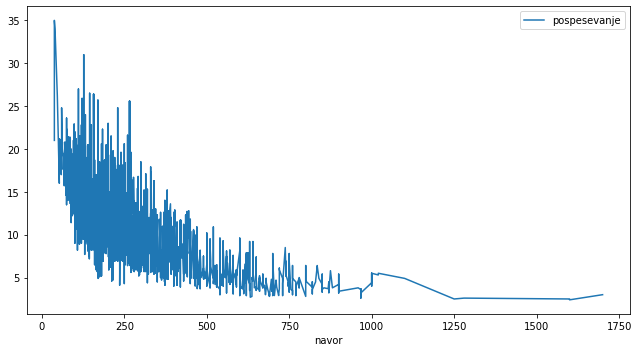

In [83]:
sortiran_navor_in_pospesek.plot(x='navor', y='pospesevanje')

Vidimo, kot je tudi pričakovano, da več navora pomeni večji pospešek. Čas pospeševanja do $100 \frac{km}{h}$ pada eksponentno.

Zanima me kateri avti imajo več kot $1500 Nm$ navora.

In [48]:
avti[avti['navor'] > 1500]

,znamka,model,generacija,verzija,prvo leto proizvodnje,gorivo,poravnava motorja,prostornina motorja,moč motorja,prisilno polnenje motorja,pospesevanje,max hitrost,navor,emisije,poraba
4806,Bugatti,Chiron,NaN,Bugatti Chiron,2016.0,Petrol,NaN,7993.0,1500.0,NaN,2.5,420.0,1600.0,NaN,NaN
6237,Bugatti,Divo,NaN,Bugatti Divo,2020.0,Petrol,NaN,7993.0,1500.0,NaN,2.4,380.0,1600.0,506.0,22.5
6956,Lotus,Evija,NaN,EV,2020.0,Electric,NaN,NaN,1471.0,NaN,3.0,320.0,1700.0,NaN,NaN


Pričakovano.

## 5. Ali je pri večji porabi tudi več emisij $CO_2$?

Podobno kot prej nas zdaj zanimata razdelka 'poraba' in 'emisije'. Ker želim videti odvisnost količine emisij od porabe, sortiram po naraščajočih vrednosti porabe.

In [49]:
poraba_in_emisije = avti[['poraba', 'emisije']].dropna().sort_values('poraba')
poraba_in_emisije

,poraba,emisije
12991,0.0,149.0
4276,0.0,157.0
4292,0.0,157.0
12018,0.0,109.0
5720,0.0,177.0
...,...,...
1592,22.9,547.0
6683,24.9,596.0
6069,24.9,595.0
6071,24.9,595.0


<AxesSubplot:xlabel='poraba'>

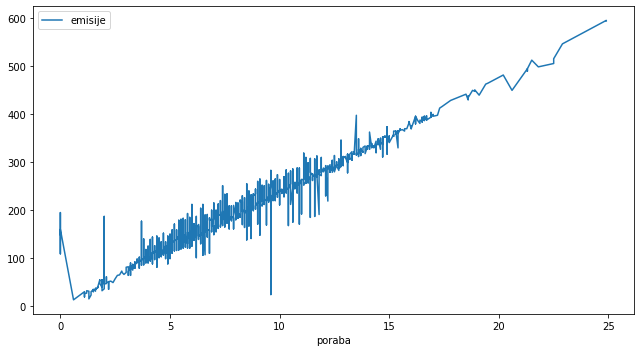

In [50]:
poraba_in_emisije.plot(x='poraba', y='emisije')

Opazimo, da emisije s porabo naraščajo linearno. 

## 6. Kako je skozi leta rastla povprečna moč motorja?

Če leta in moči motorjev sortiramo po letih, se zdi kot da je moč motorja po letih naraščala. Podoben rezultat dobimo, če opazujemo povprečne vrednosti moči motorja po letih.

In [51]:
ml = avti[['prvo leto proizvodnje', 'moč motorja']].dropna().sort_values('prvo leto proizvodnje')
ml

,prvo leto proizvodnje,moč motorja
14938,1898.0,2.0
9928,1903.0,0.0
9927,1903.0,0.0
1607,1903.0,0.0
1606,1903.0,0.0
...,...,...
5878,2021.0,186.0
5877,2021.0,122.0
5876,2021.0,122.0
6867,2022.0,272.0


In [52]:
moc_in_leta = ml.groupby('prvo leto proizvodnje').mean().round(1)
moc_in_leta

,moč motorja
prvo leto proizvodnje,
1898.0,2.0
1903.0,0.0
1904.0,4.7
1905.0,0.0
1908.0,0.0
...,...
2018.0,185.8
2019.0,210.4
2020.0,252.2


In [85]:
moc_in_leta_negrupirano = moc_in_leta.reset_index()
moc_in_leta_negrupirano

,prvo leto proizvodnje,moč motorja
0,1898.0,2.0
1,1903.0,0.0
2,1904.0,4.7
3,1905.0,0.0
4,1908.0,0.0
...,...,...
97,2018.0,185.8
98,2019.0,210.4
99,2020.0,252.2
100,2021.0,219.7


Če narišemo graf, opazimo, da se povprečna moč motorja skozi leta ni veliko spreminjala, saj vsako leto izdajo avte tako z velikimi močmi kot tudi z manjšimi.

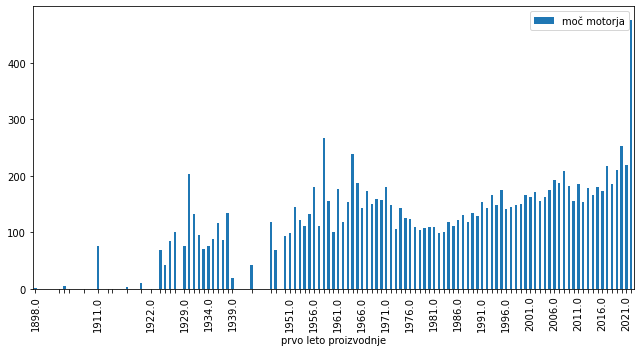

In [84]:
graf_6 = moc_in_leta_negrupirano.plot.bar(x='prvo leto proizvodnje', label = None)
for i, t in enumerate(graf_6.get_xticklabels()):   # Kadar imam podatek o več zaporednih letih, si želim, da mi na x-osi označi vsako peto leto
    if (i % 5) != 0:
        t.set_visible(False)

## 7. Ali je maksimalna hitrost vozila odvisna od njegove teže?

Spet združimo tabeli v datotekah 'izluščene_informacije.csv' in 'dimenzije.csv', saj potrebujemo maksimalno hitrost iz prve in težo iz druge tabele. Sortiram po teži in izbrišem vse neuporabne vrstice, torej tiste, ki jim kateri od podatkov manjka.

In [55]:
ht = pd.merge(avti, dimenzije, on='verzija')
hitrost_in_teza = ht[['max hitrost', 'teža']].dropna().sort_values('teža')
hitrost_in_teza

,max hitrost,teža
53624,197.0,0.0
68486,45.0,280.0
60141,80.0,474.0
60139,160.0,474.0
45525,250.0,500.0
...,...,...
65418,200.0,2774.0
65417,200.0,2774.0
65419,200.0,2774.0
65420,200.0,2774.0


<AxesSubplot:xlabel='teža', ylabel='max hitrost'>

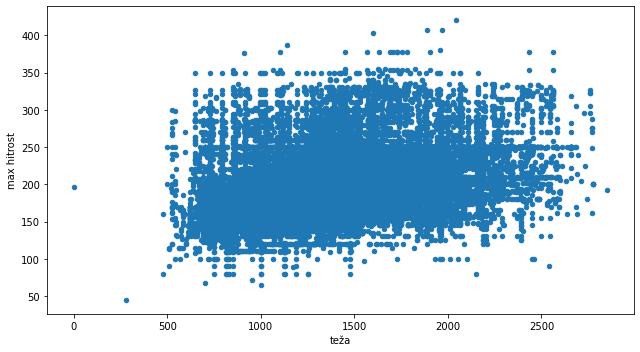

In [56]:
hitrost_in_teza.plot.scatter(x='teža', y='max hitrost')

Zgleda kot da maksimalna hitrost in teža vozila nista bistveno povezani. 

## 8. Ali je v katerem časovnem obdobju katera znamka izdala več verzij kot ostale?

Podatek o vseh letih, v katerih so izdelovali določeno verzijo avtomobila je shranjen v datoteki 'leta.csv' Združimo jo z glavno tabelo. 

In [57]:
leta = pd.read_csv('../zajem-podatkov/obdelani-podatki/leta.csv')
leta

,znamka,model,generacija,verzija,leto
0,Polestar,1,NaN,T8R,2020
1,Polestar,1,NaN,T8R,2021
2,Rover,100,NaN,1.1 ate97,1995
3,Rover,100,NaN,1.1 ate97,1996
4,Rover,100,NaN,1.1 ate97,1997
...,...,...,...,...,...
53987,Citroen,ZX,NaN,2.0,1992
53988,Citroen,ZX,NaN,2.0,1993
53989,Citroen,ZX,NaN,2.0,1994
53990,Citroen,ZX,NaN,2.0,1995


In [58]:
zl = pd.merge(avti, leta, on='verzija')[['znamka_x', 'leto', 'verzija']]
zl

,znamka_x,leto,verzija
0,Polestar,2020,T8R
1,Polestar,2021,T8R
2,Rover,1995,1.1 ate97
3,Rover,1996,1.1 ate97
4,Rover,1997,1.1 ate97
...,...,...,...
237518,Citroen,1994,1.9 TD DHY
237519,Citroen,1995,1.9 TD DHY
237520,Citroen,1996,1.9 TD DHY
237521,Citroen,1997,1.9 TD DHY


Za lažjo interpretacijo, lahko opazujemo katera znamka je izdelala največ različnih verzij v vsakem petletju od začetka industrije. Namesto podatka 'leto' zato shranimo podatek 'petletje'.

In [59]:
zl['petletje'] = zl.leto // 5 * 5
znamke_in_leta = zl[['petletje', 'znamka_x', 'verzija']]
znamke_in_leta

,petletje,znamka_x,verzija
0,2020,Polestar,T8R
1,2020,Polestar,T8R
2,1995,Rover,1.1 ate97
3,1995,Rover,1.1 ate97
4,1995,Rover,1.1 ate97
...,...,...,...
237518,1990,Citroen,1.9 TD DHY
237519,1995,Citroen,1.9 TD DHY
237520,1995,Citroen,1.9 TD DHY
237521,1995,Citroen,1.9 TD DHY


In [60]:
# Za vsako znamko naredimo serijo, ki po petletjih prešteje koliko različnih verzij je bilo izdelanih.
def naredi_series(z):
    shrani = znamke_in_leta[znamke_in_leta.znamka_x == z]
    return shrani['petletje'].value_counts()

# Ustvarimo slovar, ki ima za ključe imena znamk, pod njihove vrednosti pa vstavi ustvarjene serije.
okvir = dict()
for z in list(znamke_in_leta.znamka_x.unique()):
    okvir[str(z)] = naredi_series(z)

# S tako obliko slovarja lahko tvorimo DataFrame - tabelo.
tabela_let_in_znamk = pd.DataFrame(okvir)
# Dodajmo še stolpec 'Povprečje', ki za vsako petletje izračuna povprečno število 
# različnih verzij, ki so jih firme izdelovale.
tabela_let_in_znamk['Povprečje'] = tabela_let_in_znamk.mean(axis = 1)
# Dodajmo še stolpec 'Izdala več', ki shrani maksimalno število različnih verzij,
# ki jih je vsaj eno podjetje izdelovalo "naenkrat" v določenem petletju.
tabela_let_in_znamk['Izdala več'] = tabela_let_in_znamk.max(axis = 1)
tabela_let_in_znamk

,Polestar,Rover,Mazda,Volvo,Suzuki,Smart,Opel,Fiat,Kia,Lancia,...,Infiniti,Lincoln,Rolls Royce,Lexus,Alpina,Genesis,Cupra,Tesla,Povprečje,Izdala več
0,NaN,NaN,1.0,97.0,8.0,NaN,1.0,5.0,13.0,17,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,6.812500,97.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,15.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,15.0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,15.0
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,NaN,748.0,2548.0,1617.0,1201.0,86.0,1850.0,1029.0,884.0,630,...,29.0,57.0,29.0,85.0,55.0,18.0,NaN,1.0,637.625000,2548.0
2005,NaN,495.0,1313.0,1195.0,847.0,67.0,1410.0,581.0,572.0,420,...,62.0,28.0,18.0,121.0,23.0,17.0,NaN,2.0,440.107143,1687.0
2010,NaN,123.0,369.0,1036.0,352.0,14.0,638.0,417.0,215.0,274,...,224.0,39.0,25.0,206.0,NaN,2.0,NaN,5.0,317.428571,1413.0
2015,NaN,35.0,458.0,563.0,400.0,34.0,766.0,321.0,668.0,51,...,95.0,15.0,43.0,306.0,NaN,50.0,1.0,68.0,340.754386,1641.0


Tvorimo novi Series, ki za vsako petletje izpiše tisto znamko, katere število različnih verzij je maksimalno za tisto petletje ('Izdala več') ter presega povprečje za več kot $2,5$-krat.

In [61]:
slovar = dict()
for petletje in list(tabela_let_in_znamk.index.values):
    for znamka in tabela_let_in_znamk.keys()[:-2]:
        if (tabela_let_in_znamk[znamka][petletje] == tabela_let_in_znamk['Izdala več'][petletje] 
        and tabela_let_in_znamk[znamka][petletje] > 2.5 * tabela_let_in_znamk['Povprečje'][petletje]):
            slovar[petletje] = znamka

series = pd.Series(data = slovar)
series


0               Volvo
1900         Cadillac
1910           Lancia
1915           Lancia
1920           Lancia
1925           Lancia
1930              BMW
1935              BMW
1945           Lancia
1950          Ferrari
1955        Chevrolet
1960           Lancia
1965    Mercedes Benz
1970             Ford
1975            Mazda
1980            Mazda
1985            Mazda
1990            Mazda
1995            Mazda
2000            Mazda
2005          Peugeot
2010          Peugeot
2015    Mercedes Benz
2020    Mercedes Benz
dtype: object

Opazimo, da je v začetku industrije bilo ustvarjenih več avtomobilov znamke Lancia, nakar je vodstvo prevzel BMW, a Lancia še vseeno ni zmanjšala proizvodnje, saj je bila spet v letih 1945 - 1949 in 1960 - 1964 vodilna po produkciji različnih verzij. V zadnji četrtini prejšnega stoletja je Mazda izdelala opazno več različnih verzij kot ostali proizvajalci avtomobilov. V začetku trenutnega tisočletja, je v ospredje stopilo podjetje Peugeot, v zadnjih letih pa je ustvarjenih vse več Mercedes-ov.